## Método de Euler

Es un procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias a partir de un valor inicial. El método de Euler es el más simple de los métodos numéricos resolver un problema del siguiente tipo:

$\frac{dy}{dx} = f(x,y)$

$y(x_0) = y_0$

$y(x_i) = ?$

(1) Primero se divide el intervalo $I$, $x_i <x<  x_f$ (donde $x_i$ inicio y $x_f$ fin) en $n$ subintervalos de ancho $h$ ; es decir:

$h = \frac{x_f - x_i}{n}$,


de manera que se obtiene un conjunto discreto de $n+1$ puntos:  $x_0, x_1, x_2, ...,x_n$ del intervalo $I$. Para cualquiera de estos puntos se cumlple que:

$x_k = x_0 + k\,h$, donde $0 \leq k \leq n$.

La condición inicial  $y(x_0) = y_0$, representa el punto $P_0 = (x_0, y_0)$, por donde pasa la curva solución de la ecuación de el planteamiento inicial, la cual se denotará como  $F(x)= y$.

Ya teniendo el punto  $P_0$ se puede evaluar la primera derivada de  $F(x)$ en ese punto; por lo tanto:

$F'(x) = \frac{dy}{dx}\bigr\rvert_{P_0} = f(x_0,y_0)$

Con esta información se traza una recta, aquella que pasa por  $P_0$ y de pendiente $f(x_0, y_0)$. Esta recta aproxima  $F(x)$ en una vecinidad de $x_0$. Tómese la recta como reemplazo de $F(x)$ y localícese en ella (la recta) el valor de y correspondiente a $x_1$. Entonces, podemos deducir segun la Gráfica A:

$\frac{y_1 - y_0}{x_1 - x_0} = f(x_0,y_0)$

![title](figuras/Metodo_de_Euler.png)

Se resuelve para $y_1$:

$y_1 = y_0 + (x_1 - x_0) f(x_0,y_0) = y_0 + h f(x_0, y_0)$

Es evidente que la ordenada $y_1$ calculada de esta manera no es igual a $F(x_1)$ pues existe un pequeño error. Sin embargo, el valor $y_1$ sirve para que se aproxime $F'(x)$ en el punto $P = (x_1,y_1)$ y repetir el procedimiento anterior a fin de generar la sucesión de aproximaciones siguiente:

 \begin{array}{crl}  
 y_1 = y_0 + h f (x_0,y_0)\\        
 y_2 = y_1 + h f (x_1,y_1)\\                   
 .\\          
 .\\
 .\\
 y_{k+1} = y_k + h f (x_k,y_k)\\
 .\\
 .\\
 .\\
 y_n = y_{n-1} + h f (x_{n-1},y_{n-1})\\  
 \end{array}   

In [1]:
# cargar primero las librerías 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# defino una función que depende de 5 elementos
# y' = f
# y(x_ini) = y0

# euler(función, condición inicial, inicio, fin, número de pasos)
def euler(f, y0, xini, xfin, nsteps):
    
    # tamaño de los subintervalos
    h = (xfin - xini)/(nsteps) 
    
    # se crea un arreglo de las solución y con n entradas todas cero 
    y = np.zeros(nsteps) 
    
    # el primer elemento es la condición inicial
    y[0] = y0  
    
    # defino la variable independiente
    x = np.linspace(xini, xfin, nsteps) 
    
    # calcula iterativamente y_i usando el método de Euler y lo guarda en un arreglo
    for n in range(nsteps-1): 
        
        # es la fórmula
        y[n+1] = y[n] +h*f(x[n],y[n])
        
    # guarda una arreglo de dos elementos, x y, cada uno es un arreglo, es un arreglo de dos arreglos
    return [x, y] 

### ejemplo 1

Como ejemplo vamos a resolver la ley del enfriamiento de Newton. Establece que la tasa de disminución de temperatura de un cuerpo es proporcional a la diferencia de temperatura entre el cuerpo $T$ y sus alrededores $T_m$ multiplicado por un factor de proporcionalidad $r$.

$\frac{dT}{dt} = -r(T- T_m)$.

Esta ecuación es fácil de integrar, la solución analítica es:

$T(t) = T_m +(T_0-T_m)\, e^{-rt}$


In [3]:
# defino una función con la solución analítica
def sol_analitica(r, Tm, T0, time):
    return Tm+(T0-Tm)*np.exp(-r*time)    

In [4]:
# condiciones iniciales, es necesario que T_ini > T_medio
temp_0 = 100 # temperatura inicial
temp_m = 20  # temperatura del medio ambiente
r = 0.07     # constante de proporcionalidad
inicio = 0   # tiempo inicial
fin = 100    # tiempo final

# F'= dT/dt
def temperatura(time, Temp):
    Temp_m = 20
    r = 0.07
    return -r*(Temp-Temp_m)

t = np.linspace(inicio, fin, 1000) # variable independiente de la solución analítica
sol = sol_analitica(r, temp_m, temp_0, t)

In [5]:
# la función euler debe dar un arreglo de dos arreglos (x,y), que en nuestro caso particular es (tiempo, temperatura)
euler(temperatura, temp_0, inicio, fin, 10)  # 10 pasos

[array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
          44.44444444,   55.55555556,   66.66666667,   77.77777778,
          88.88888889,  100.        ]),
 array([ 100.        ,   44.        ,   27.2       ,   22.16      ,
          20.648     ,   20.1944    ,   20.05832   ,   20.017496  ,
          20.0052488 ,   20.00157464])]

In [6]:
# Puedo separar los arreglos

t1, T100 = euler(temperatura, temp_0, inicio, fin, 100) # 100 pasos
t2, T20  = euler(temperatura, temp_0, inicio, fin, 20)  # 20 pasos
t3, T10  = euler(temperatura, temp_0, inicio, fin, 10)  # 10 pasos

In [7]:
t3

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [8]:
T10

array([ 100.        ,   44.        ,   27.2       ,   22.16      ,
         20.648     ,   20.1944    ,   20.05832   ,   20.017496  ,
         20.0052488 ,   20.00157464])

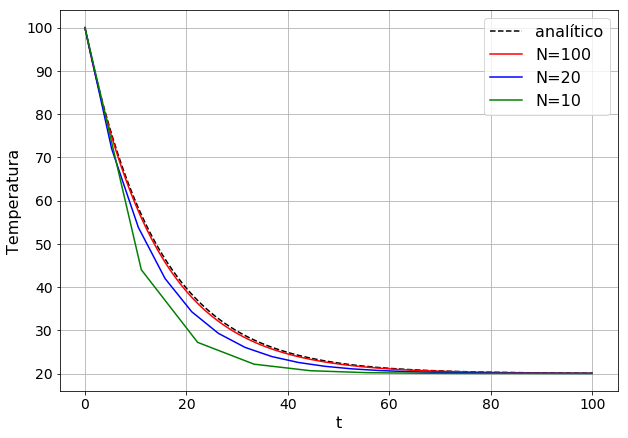

In [9]:
plt.figure(figsize=(10,7))

plt.plot(t, sol, '--k', label ='analítico') 

plt.plot(t1, T100, 'r', label ='N=100') # es importante que tengan el mismo tamaño los dos arreglos 
plt.plot(t2, T20,  'b', label ='N=20')
plt.plot(t3, T10,  'g', label ='N=10')

plt.legend(loc = 'best', fontsize = 16) 
plt.xlabel('t', fontsize=16)
plt.ylabel('Temperatura', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)
plt.show()

Podemos ver que dependiendo el número de pasos mejora o empeora la precisión. El error es fácil de calcular.

$error = \left|\frac{analítico - numérico}{analítico}\right|$

In [10]:
# función para graficar porcentaje
# no es necesario estudiarla
from matplotlib.ticker import FuncFormatter
import matplotlib
# función que define el porcentaje
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

formatter = FuncFormatter(to_percent)

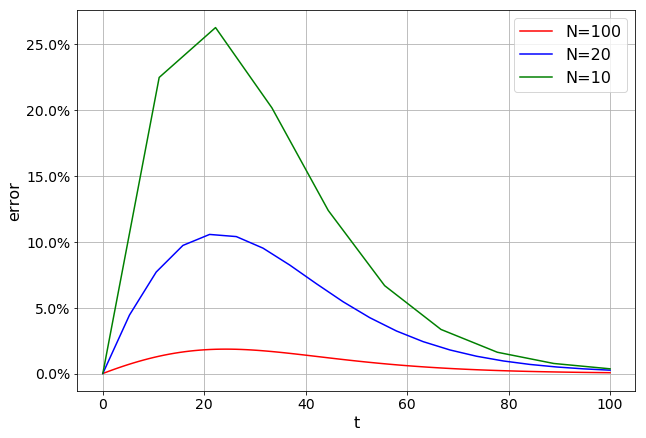

In [11]:
temp_0 = 100 # temperatura inicial
temp_m = 20  # temperatura del medio ambiente
r = 0.07     # constante de proporcionalidad

# cálculo del error. Es importante que tengan el mismo tamaño los dos arreglos 
error100 = np.abs((sol_analitica(r, temp_m, temp_0, t1) - T100)/sol_analitica(r, temp_m, temp_0, t1))
error20  = np.abs((sol_analitica(r, temp_m, temp_0, t2) - T20)/sol_analitica(r, temp_m, temp_0, t2))
error10  = np.abs((sol_analitica(r, temp_m, temp_0, t3) - T10)/sol_analitica(r, temp_m, temp_0, t3))

#gráfica
plt.figure(figsize=(10,7))

plt.plot(t1, error100, 'r', label ='N=100') 
plt.plot(t2, error20,  'b', label ='N=20')
plt.plot(t3, error10,  'g', label ='N=10')

plt.gca().yaxis.set_major_formatter(formatter) # porcentaje

plt.legend(loc = 'best', fontsize = 16) 
plt.xlabel('t', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)
plt.show()

Hacer subgráficas

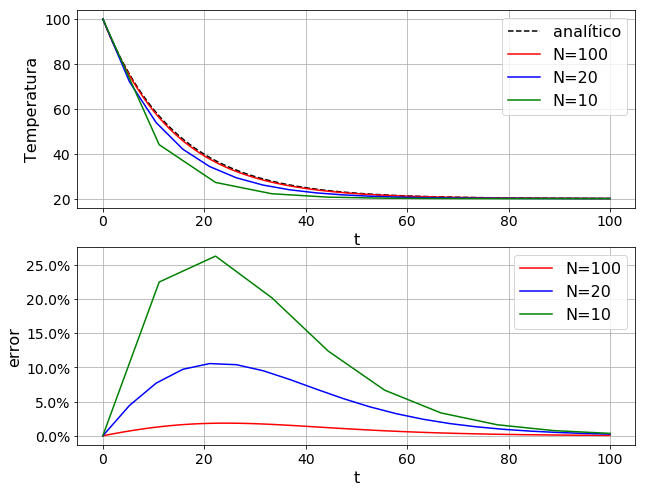

In [12]:
# gráfica principal
plt.figure(figsize=(10, 8))

# subgráfica 1
plt.subplot(211)
# este es el comando de subgráfica, el primer número es el número de renglones, 
# el segundo el número de columnas y el último la etiqueta de la subgráfica

## estos son comandos normales de gráfica ya vistos antes ##
plt.plot(t, sol, '--k', label ='analítico') 
plt.plot(t1, T100, 'r', label ='N=100') # es importante que tengan el mismo tamaño los dos arreglos 
plt.plot(t2, T20,  'b', label ='N=20')
plt.plot(t3, T10,  'g', label ='N=10')
plt.legend(loc = 'best', fontsize = 16) 
plt.xlabel('t', fontsize=16)
plt.ylabel('Temperatura', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

# subgráfica 2
plt.subplot(212) # vean que los dos primeros números deben coincidir con los de la subgráfica anterios, solo calbia la etiqueta.

## estos son comandos normales de gráfica ya vistos antes ##
plt.plot(t1, error100, 'r', label ='N=100') 
plt.plot(t2, error20,  'b', label ='N=20')
plt.plot(t3, error10,  'g', label ='N=10')
plt.gca().yaxis.set_major_formatter(formatter) # porcentaje
plt.legend(loc = 'best', fontsize = 16) 
plt.xlabel('t', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

# al final siempre hay que poner este comando
plt.show()

### ejemplo 2

Resolver el problema de condiciones iniciales

$\frac{dx}{dt} = x \cos(t)$

$x(\pi) = 1$

Integren la ecuación anterior y comprueben que la solución analítica es

$x(t) = e^{\sin(t)}$

In [13]:
# defino una función para la ecuación diferenciañ
def ec1(t,x):
    return x*np.cos(t)

In [14]:
cond_ini = 1 # condición inicial

inicio = np.pi # inicio del intervalo np.pi se el valor de pi=3.1416...
fin = 50       # fin del intervalo

# haremos tres casos de nsteps
N1 = 100
N2 = 1000
N3 = 10000

# calculo la solución numérica (t,x)
t1, x1 = euler(ec1, cond_ini, inicio, fin, N1) 
t2, x2 = euler(ec1, cond_ini, inicio, fin, N2)
t3, x3 = euler(ec1, cond_ini, inicio, fin, N3)

# cálculo del error. Es importante que tengan el mismo tamaño los dos arreglos 
err1 = np.abs(np.exp(np.sin(t1)) - x1)/np.exp(np.sin(t1))
err2 = np.abs(np.exp(np.sin(t2)) - x2)/np.exp(np.sin(t2))
err3 = np.abs(np.exp(np.sin(t3)) - x3)/np.exp(np.sin(t3))

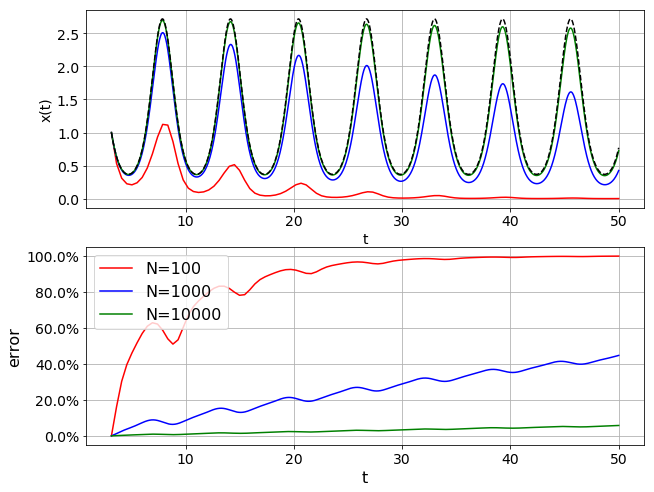

In [18]:
# gráfica principal
plt.figure(figsize=(10, 8))

# subgráfica 1
plt.subplot(211)
plt.plot(t1, x1, 'r', label ='N=100') 
plt.plot(t2, x2, 'b', label ='N=1000')
plt.plot(t3, x3, 'g', label ='N=10000')
plt.plot(t3,  np.exp(np.sin(t3)), '--k', label ='analítica')
#lt.legend(loc = 'best', fontsize = 14) 
plt.xlabel('t', fontsize=14)
plt.ylabel('x(t)', fontsize=14)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

# subgráfica 2
plt.subplot(212)
plt.plot(t1, err1, 'r', label ='N=100') 
plt.plot(t2, err2, 'b', label ='N=1000')
plt.plot(t3, err3, 'g', label ='N=10000')
plt.gca().yaxis.set_major_formatter(formatter) # porcentaje
plt.legend(loc = 'best', fontsize = 16) 
plt.xlabel('t', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

plt.show()

Para funciones que oscilan, es decir que su pendiente a la recta tanhente cambia de signo periódicamente el método de Euler no funciona bien.

### Método de Euler para una ecuación diferencial de segundo orden

Como ejemplo resolveremos la ecuación de un oscilador armónico amortiguado

$m\ddot{x} + b\dot{x}+kx=0$

con condiciones iniciales: 

$x(t_0) = x_0, \quad \dot{x}(t_0) = \dot{x}_0$

Se debe transformar la EDO de segundo orden en un sistema de EDO de primer orden. Para ello definimos las variables auxiliares:

$u=x, \quad v=\dot{x}$

derivando las variables auxiliares

$\dot{u} = \dot{x} = v$

$\dot{v} = \ddot{x} = -\frac{b}{m}\dot{x} -\frac{k}{m}x = -\frac{b}{m} v -\frac{k}{m}u $

Las derivadas $\dot{u}$ y $\dot{v}$ son pendientes $f(t,u,v)$ y $g(t,u,v)$ de rectas tangentes, entonces el sistema de ecuaciones es

$\dot{u} = f(t,u,v) = v$

$\dot{v} = \ddot{x} = -\frac{b}{m}\dot{x} -\frac{k}{m}x = -\frac{b}{m} v -\frac{k}{m}u $


In [17]:
def euler2(m, k, b, u0, v0, t_ini, t_fin, nsteps):
    h = (t_fin - t_ini)/(nsteps) # tamaño de los subintervalos
    u = np.zeros(nsteps) # se crea un arreglo de las solución y con n entradas todas cero 
    v = np.zeros(nsteps) # se crea un arreglo de las solución y con n entradas todas cero 
    t = np.linspace(t_ini, t_fin, nsteps) # defino la variable independiente
    
    u[0] = u0   # el primer elemento es la condición inicial
    v[0] = v0   # el primer elemento es la condición inicial
    
    for j in range(nsteps-1): # calcula iterativamente y_i usando el método de Euler y lo guarda en un arreglo
        u[j+1] = u[j] +h*v[j]
        v[j+1] = v[j] +h*(-(b/m)*v[j] -(k/m)*u[j])
    return [t,u,v]

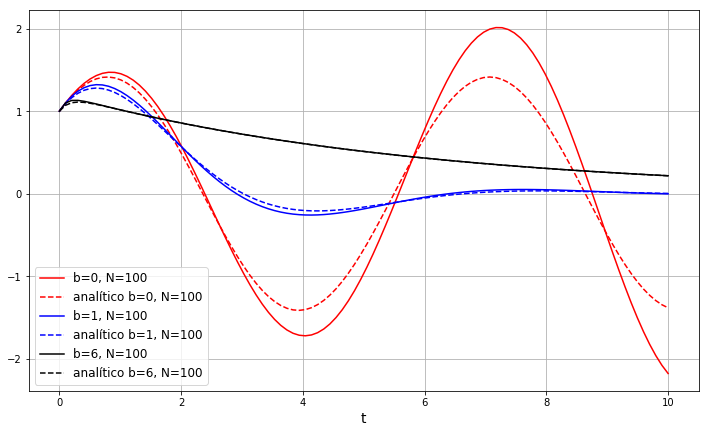

In [18]:
m = 1
k = 1
u0 = 1
v0 = 1
inicio = 0
fin    = 10
N      = 100

tt0, uu0, vv0 = euler2(m, k, 0, u0, v0, inicio, fin, N)
b0 = np.cos(tt0) + np.sin(tt0)

tt1, uu1, vv1 = euler2(m, k, 1, u0, v0, inicio, fin, N)
b1 = np.exp(-tt1/2)*(np.cos(np.sqrt(3)*tt1/2) + np.sqrt(3)*np.sin(np.sqrt(3)*tt1/2))

tt2, uu2, vv2 = euler2(m, k, 6, u0, v0, inicio, fin, N)
b2 = np.exp(-3*tt2)*(np.cosh(2*np.sqrt(2)*tt2) + np.sqrt(2)*np.sinh(2*np.sqrt(2)*tt2))

plt.figure(figsize=(12,7))

plt.plot(tt0, uu0, 'r', label ='b=0, N=100')
plt.plot(tt0, b0 , 'r--', label ='analítico b=0, N=100')

plt.plot(tt0, uu1, 'b', label ='b=1, N=100')
plt.plot(tt1, b1 , 'b--', label ='analítico b=1, N=100')

plt.plot(tt0, uu2, 'k', label ='b=6, N=100')
plt.plot(tt2, b2 , 'k--', label ='analítico b=6, N=100')

plt.legend(loc = 'best', fontsize = 12) 
plt.xlabel('t', fontsize=14)
plt.ylabel('', fontsize=14)
plt.grid(True)
plt.show()

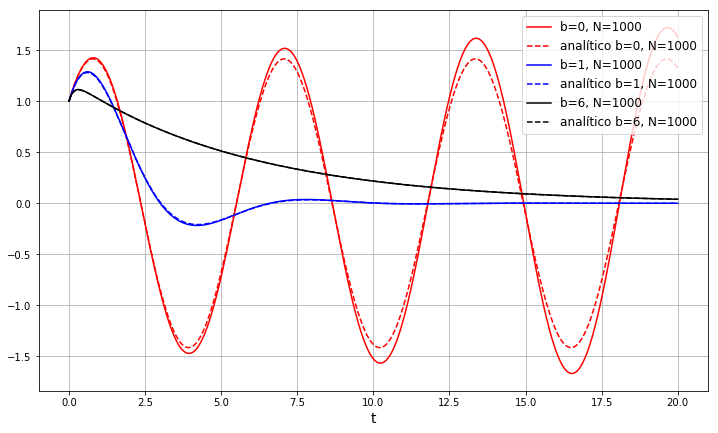

In [19]:
m = 1
k = 1
u0 = 1
v0 = 1
inicio = 0
fin    = 20
N      = 1000

tt0, uu0, vv0 = euler2(m, k, 0, u0, v0, inicio, fin, N)
b0 = np.cos(tt0) + np.sin(tt0)

tt1, uu1, vv1 = euler2(m, k, 1, u0, v0, inicio, fin, N)
b1 = np.exp(-tt1/2)*(np.cos(np.sqrt(3)*tt1/2) + np.sqrt(3)*np.sin(np.sqrt(3)*tt1/2))

tt2, uu2, vv2 = euler2(m, k, 6, u0, v0, inicio, fin, N)
b2 = np.exp(-3*tt2)*(np.cosh(2*np.sqrt(2)*tt2) + np.sqrt(2)*np.sinh(2*np.sqrt(2)*tt2))

plt.figure(figsize=(12,7))

plt.plot(tt0, uu0, 'r', label ='b=0, N=1000')
plt.plot(tt0, b0 , 'r--', label ='analítico b=0, N=1000')

plt.plot(tt0, uu1, 'b', label ='b=1, N=1000')
plt.plot(tt1, b1 , 'b--', label ='analítico b=1, N=1000')

plt.plot(tt0, uu2, 'k', label ='b=6, N=1000')
plt.plot(tt2, b2 , 'k--', label ='analítico b=6, N=1000')

plt.legend(loc = 'best', fontsize = 12) 
plt.xlabel('t', fontsize=14)
plt.ylabel('', fontsize=14)
plt.grid(True)
plt.show()

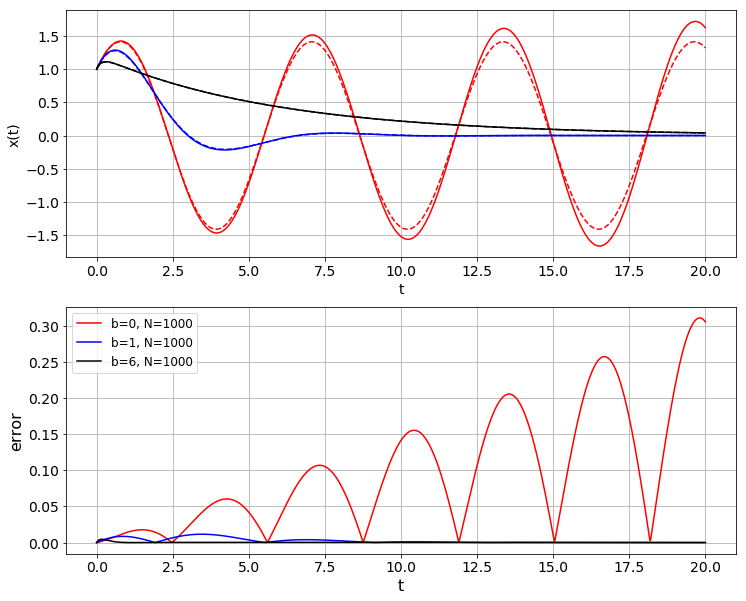

In [20]:
# gráfica principal
plt.figure(figsize=(12, 10))

# subgráfica 1
plt.subplot(211)
plt.plot(tt0, uu0, 'r', label ='b=0, N=1000')
plt.plot(tt0, b0 , 'r--', label ='analítico b=0, N=1000')
plt.plot(tt0, uu1, 'b', label ='b=1, N=1000')
plt.plot(tt1, b1 , 'b--', label ='analítico b=1, N=1000')
plt.plot(tt0, uu2, 'k', label ='b=6, N=1000')
plt.plot(tt2, b2 , 'k--', label ='analítico b=6, N=1000')
#lt.legend(loc = 'best', fontsize = 14) 
plt.xlabel('t', fontsize=14)
plt.ylabel('x(t)', fontsize=14)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

# subgráfica 2
plt.subplot(212)
plt.plot(tt0, np.abs(b0-uu0), 'r', label ='b=0, N=1000')
plt.plot(tt0, np.abs(b1-uu1), 'b', label ='b=1, N=1000')
plt.plot(tt0, np.abs(b2-uu2), 'k', label ='b=6, N=1000')
#plt.gca().yaxis.set_major_formatter(formatter) # porcentaje
plt.legend(loc = 'best', fontsize = 12) 
plt.xlabel('t', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.tick_params(labelsize=14) # tamaño de los ticks
plt.grid(True)

plt.show()